# Análisis de datos de Airbnb

El objetivo de este proyecto es analizar los alojamientos de Airbnb en una ciudad
utilizando técnicas básicas de análisis de datos vistas en el Módulo 3.

In [60]:
# Carga de datasets proporcionados por Inside Airbnb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

listings = pd.read_csv("listings.csv")
neighbourhoods = pd.read_csv("neighbourhoods.csv")
reviews = pd.read_csv("reviews.csv")



In [61]:
# EDA - Análisis exploratorio de datos

listings.head()
listings.shape
listings.info()
listings.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10834 non-null  int64  
 1   name                            10834 non-null  object 
 2   host_id                         10834 non-null  int64  
 3   host_name                       10824 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10834 non-null  object 
 6   latitude                        10834 non-null  float64
 7   longitude                       10834 non-null  float64
 8   room_type                       10834 non-null  object 
 9   price                           9498 non-null   float64
 10  minimum_nights                  10834 non-null  int64  
 11  number_of_reviews               10834 non-null  int64  
 12  last_review                     

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.083400e+04,1.083400e+04,0.0,10834.000000,10834.000000,9498.000000,10834.000000,10834.000000,9883.000000,10834.000000,10834.000000,10834.000000,0.0
mean,7.175053e+17,2.340222e+08,NaN,50.080999,14.430444,4010.184881,3.877331,77.881761,2.266761,18.964187,179.655621,20.217464,NaN
std,5.812591e+17,2.264005e+08,NaN,0.016805,0.031805,17025.399923,24.335284,117.889441,2.095847,24.436853,124.150478,24.379999,NaN
min,2.316300e+04,5.282000e+03,NaN,49.947830,14.271417,223.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,3.736095e+07,3.242314e+07,NaN,50.075140,14.418223,1536.000000,1.000000,6.000000,0.530000,2.000000,61.000000,1.000000,NaN
50%,8.677969e+17,1.421830e+08,NaN,50.081598,14.428889,2152.000000,2.000000,29.000000,1.740000,7.000000,172.000000,10.000000,NaN
75%,1.262448e+18,4.568548e+08,NaN,50.089258,14.444167,3183.750000,2.000000,97.000000,3.550000,28.000000,303.000000,34.000000,NaN
max,1.516083e+18,7.199963e+08,NaN,50.170570,14.684160,632000.000000,1124.000000,1943.000000,36.930000,95.000000,365.000000,435.000000,NaN


In [62]:
listings.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            10
neighbourhood_group               10834
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              1336
minimum_nights                        0
number_of_reviews                     0
last_review                         951
reviews_per_month                   951
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           10834
dtype: int64

In [63]:
# ¿Cuántos alojamientos únicos hay?
listings['id'].nunique()

10834

In [64]:
# ¿Tipos de alojamiento?
listings['room_type'].value_counts()

room_type
Entire home/apt    8973
Private room       1680
Hotel room           95
Shared room          86
Name: count, dtype: int64

In [65]:
# ¿Distribución por barrio?
listings['neighbourhood'].value_counts()

neighbourhood
Praha 1            3831
Praha 2            2046
Praha 3            1209
Praha 5             930
Praha 8             601
Praha 7             511
Praha 10            376
Praha 6             363
Praha 4             355
Praha 9             124
Praha 13             72
Praha 11             47
Praha 14             35
Praha 12             31
Praha 15             30
Libuš                29
Velká Chuchle        27
Zbraslav             15
Praha 18             14
Kunratice            13
Zličín               12
Troja                10
Praha 22             10
Dolní Chabry         10
Praha 17             10
Šeberov               9
Dolní Počernice       8
Praha 19              8
Slivenec              7
Suchdol               7
Petrovice             7
Řeporyje              7
Praha 16              7
Čakovice              6
Praha 21              6
Nedvězí               5
Nebušice              5
Vinoř                 5
Satalice              5
Přední Kopanina       4
Lipence               3
Új

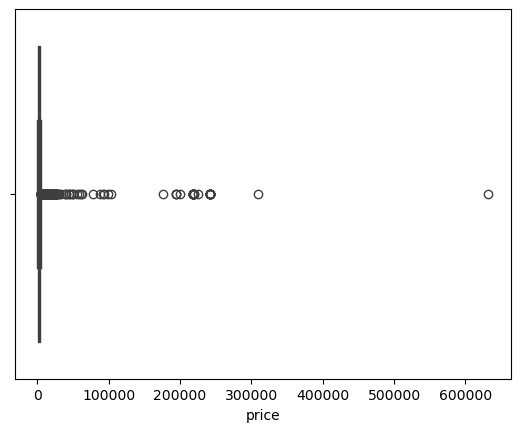

In [66]:
# ¿Outliers en el precio?
sns.boxplot(x=listings['price'])
plt.show()

# Se observan valores atípicos en el precio de algunos alojamientos.

In [67]:
listings['price'].dtype

dtype('float64')

In [68]:
# Limpieza y transformación de datos

# Limpiar precio
listings['price'] = pd.to_numeric(listings['price'], errors='coerce')
listings['price'].head()


0       NaN
1       NaN
2    2272.0
3       NaN
4    2885.0
Name: price, dtype: float64

In [69]:
# Nulos: solo eliminamos licence y neighbothood_group,
# los otros nulos conservamos pero reemplazar por 0.

listings = listings.drop(columns=['license', 'neighbourhood_group'])

listings = listings.fillna(0)

listings.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [70]:
# Eliminar duplicados

listings.drop_duplicates(inplace=True)


ANALISIS Y VISUALIZACION

PRECIOS

In [92]:
# Limpiar columna de precio, eliminando símbolos y convirtiendo a float
listings['price'] = listings['price'].replace({'€':'', ',':''}, regex=True).astype(float)


In [107]:
# Filtrar outliers

# Filtrar precios extremos usando percentiles (5% y 95%)

limite_inferior = listings['price'].quantile(0.05)
limite_superior = listings['price'].quantile(0.95)

listings_filtrado = listings[(listings['price'] >= limite_inferior) & (listings['price'] <= limite_superior)]


In [108]:
# Precio promedio por tipo de alojamiento

promedio_por_tipo = listings_filtrado.groupby('room_type')['price'].mean().sort_values(ascending=False)
print(promedio_por_tipo)


room_type
Entire home/apt    2242.016502
Hotel room         1807.670455
Private room       1149.353733
Shared room         605.581395
Name: price, dtype: float64


In [96]:
listings['price'].mean()
listings['price'].median()

# La mediana es más representativa debido a la presencia de valores atípicos.


1955.5

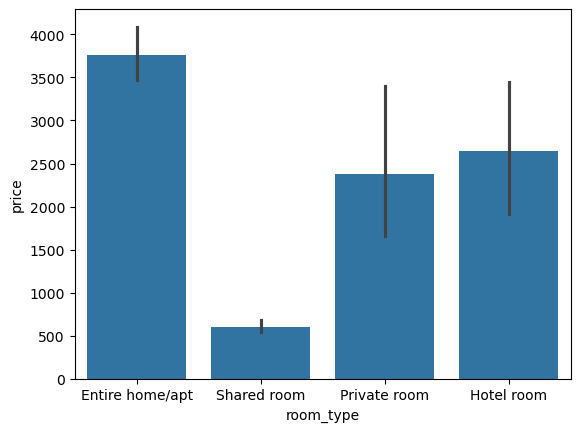

In [97]:
sns.barplot(x='room_type', y='price', data=listings)
plt.show()

In [73]:
# Ordenar de mayor a menor el precio medio por barrio

listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)


neighbourhood
Praha 18           7830.500000
Praha 7            5566.279843
Praha 2            4970.107527
Slivenec           4304.285714
Praha 9            3709.387097
Praha 3            3539.307692
Praha 5            3402.563441
Řeporyje           3384.571429
Praha 13           3352.583333
Dolní Chabry       3337.300000
Vinoř              3314.400000
Praha 1            3244.850431
Praha 15           3187.233333
Přední Kopanina    2994.000000
Libuš              2887.172414
Praha 12           2691.451613
Praha 22           2659.900000
Dubeč              2610.000000
Dolní Počernice    2581.875000
Suchdol            2503.142857
Kunratice          2441.769231
Praha 8            2289.825291
Satalice           2206.800000
Velká Chuchle      2190.518519
Praha 6            2057.614325
Lysolaje           2051.000000
Praha 10           2002.898936
Zličín             1980.500000
Praha 19           1959.375000
Nedvězí            1940.600000
Praha 17           1921.400000
Újezd              1883.6

VALORACIONES

In [74]:
listings.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [75]:
# Promedio de reseñas totales: Se calcula el promedio de reseñas por alojamiento.

listings['number_of_reviews'].mean()

np.float64(77.88176112239246)

In [76]:
# Reseñas por mes (actividad): Se analiza la frecuencia
# promedio de reseñas mensuales.

listings['reviews_per_month'].mean()

np.float64(2.067786597747831)

In [77]:
# Reseñas en el último año: Se analiza la actividad reciente de los alojamientos.

listings['number_of_reviews_ltm'].mean()

np.float64(20.217463540705186)

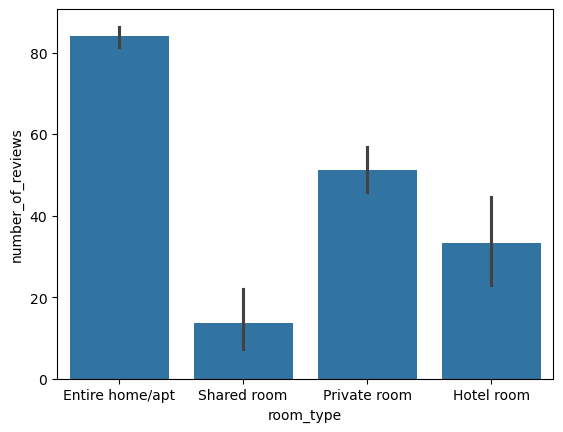

In [78]:
# VISUALIZACION: 
# Reseñas por tipo de alojamiento

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='room_type', y='number_of_reviews', data=listings)
plt.show()

# Se observa la cantidad promedio de reseñas según el tipo de alojamiento.


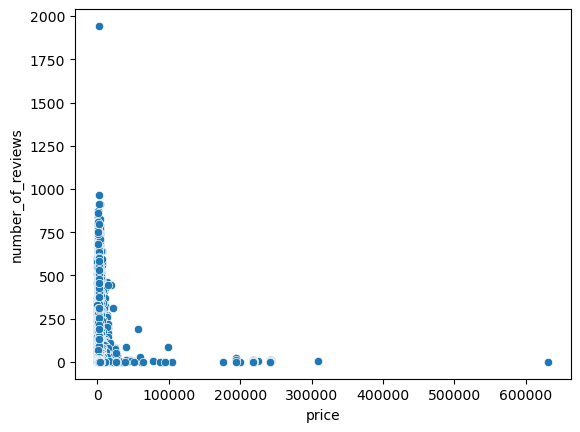

In [79]:
# Precio vs Número de reseñas

sns.scatterplot(x='price', y='number_of_reviews', data=listings)
plt.show()


DISPONIBILIDAD

In [84]:
listings['availability_365'].mean()

#En promedio, los alojamientos están disponibles 179 días al año.


np.float64(179.655621192542)

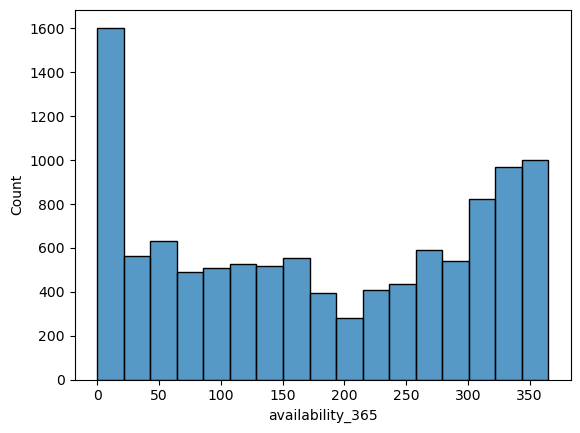

In [85]:
sns.histplot(listings['availability_365'])
plt.show()

# Se observa una concentración de alojamientos con baja y alta disponibilidad anual.




In [90]:
listings.groupby('neighbourhood')['availability_365'].mean().sort_values(ascending=False)

# La disponibilidad promedio varía según el barrio.
# Běchovice, Přední Kopanina, Petrovice y Suchdol son los que
# en promedio, presentan mayor disponibilidad anual.

# Dolní Měcholupy y Dubeč son los barrios con menor disponibilidad promedio anual.



neighbourhood
Běchovice          336.000000
Přední Kopanina    323.000000
Petrovice          318.285714
Suchdol            309.714286
Vinoř              297.600000
Velká Chuchle      275.259259
Dolní Počernice    258.000000
Lipence            257.666667
Praha 15           255.233333
Nebušice           250.000000
Dolní Chabry       232.000000
Libuš              229.689655
Praha 21           207.833333
Zbraslav           204.000000
Praha 8            200.612313
Praha 17           197.700000
Praha 5            197.229032
Zličín             195.000000
Praha 6            194.515152
Praha 7            191.994129
Praha 1            191.266771
Praha 16           189.714286
Slivenec           189.142857
Praha 11           180.787234
Řeporyje           178.571429
Štěrboholy         177.500000
Praha 12           176.129032
Praha 4            174.256338
Praha 22           173.400000
Praha 9            172.217742
Březiněves         171.333333
Praha 10           164.922872
Praha 13           161.333

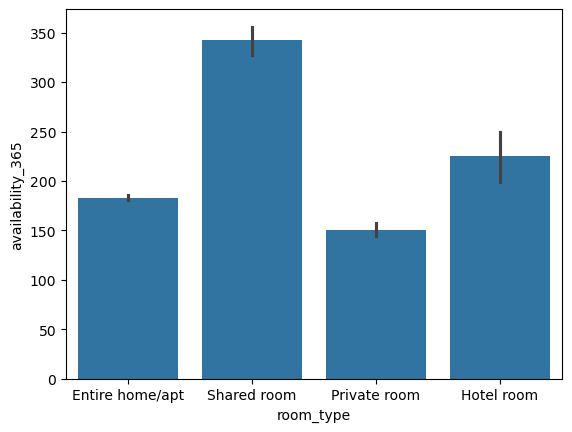

In [87]:
sns.barplot(x='room_type', y='availability_365', data=listings)
plt.show()

#Algunos tipos de alojamiento presentan mayor disponibilidad promedio que otros,
# como habitacion compartida y habitacion de hotel.
